<a href="https://colab.research.google.com/github/logarithm27/Discrete_System_Simulator/blob/master/New_York_City_Taxis_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 ## Getting started with the New York City Taxis ML Project

In [3]:
print("Hello New York, here we go !")

Hello New York, here we go !


In [0]:
import matplotlib.pyplot as plt
import descartes
import geopandas as gpd
from shapely.geometry import Point, Polygon
%matplotlib inline
import numpy as np
import pandas as pd

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Steps to follow all along this project :
#### 1 - Getting the data :
###### - Fetching data from csv files ( test and train ).
###### - Taking a quick look at the data structure of the data.
###### - Exploring attributes.
#### 2 - Discover and visualize data :
###### - Since we have longitude and latitude we can visualize data geographically.
###### - Looking for correlation between attributes.
###### - Experimenting and playing with attributes combinations if we can.
#### 3 - Preaparing data for Machine learning algorithms :
###### - Handling text and catégorical attributes ( Since ML Algorithms likes numerical attributes ).
###### - Scaling ( if our numerical input attributes have a very different scales ).
#### 4 - Last but not least : Training the Model ( Predict )

###### fetch data

In [0]:
import Main as main

###### showing data

In [6]:
train_taxi = main.get_data("/content/drive/My Drive/Data/train.csv")
test_taxi = main.get_test_data("/content/drive/My Drive/Data/test.csv")
train_taxi.head()
# we have 1,458,644 record and 11 attributes in train dataset.

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration,store_and_fwd_flag
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,455,0
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,663,0
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,2124,0
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,429,0
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,435,0


###### Quick description of data 

In [8]:
train_taxi.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1444051 entries, 0 to 1458643
Data columns (total 11 columns):
id                    1444051 non-null object
vendor_id             1444051 non-null int64
pickup_datetime       1444051 non-null datetime64[ns]
dropoff_datetime      1444051 non-null datetime64[ns]
passenger_count       1444051 non-null int64
pickup_longitude      1444051 non-null float64
pickup_latitude       1444051 non-null float64
dropoff_longitude     1444051 non-null float64
dropoff_latitude      1444051 non-null float64
trip_duration         1444051 non-null int64
store_and_fwd_flag    1444051 non-null uint8
dtypes: datetime64[ns](2), float64(4), int64(3), object(1), uint8(1)
memory usage: 122.6+ MB


In [9]:
train_taxi.describe()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration,store_and_fwd_flag
count,1.444051e+06,1.444051e+06,1.444051e+06,1.444051e+06,1.444051e+06,1.444051e+06,1.444051e+06,1.444051e+06
mean,1.534077e+00,1.663301e+00,-7.397430e+01,4.075132e+01,-7.397378e+01,4.075205e+01,8.074555e+02,5.401471e-03
std,4.988376e-01,1.313507e+00,7.013125e-02,3.230156e-02,7.016071e-02,3.540897e-02,5.754200e+02,7.329597e-02
min,1.000000e+00,0.000000e+00,-1.219333e+02,3.435970e+01,-1.219333e+02,3.218114e+01,1.000000e+00,0.000000e+00
25%,1.000000e+00,1.000000e+00,-7.399191e+01,4.073761e+01,-7.399133e+01,4.073616e+01,3.950000e+02,0.000000e+00
50%,2.000000e+00,1.000000e+00,-7.398181e+01,4.075423e+01,-7.397977e+01,4.075460e+01,6.560000e+02,0.000000e+00
75%,2.000000e+00,2.000000e+00,-7.396765e+01,4.076839e+01,-7.396317e+01,4.076990e+01,1.058000e+03,0.000000e+00
max,2.000000e+00,9.000000e+00,-6.133553e+01,5.188108e+01,-6.133553e+01,4.392103e+01,3.439000e+03,1.000000e+00


In [0]:
# set id as index 
train_taxi.set_index('id', inplace=True)

###### Quick way to get a feel with data that we're dealing with

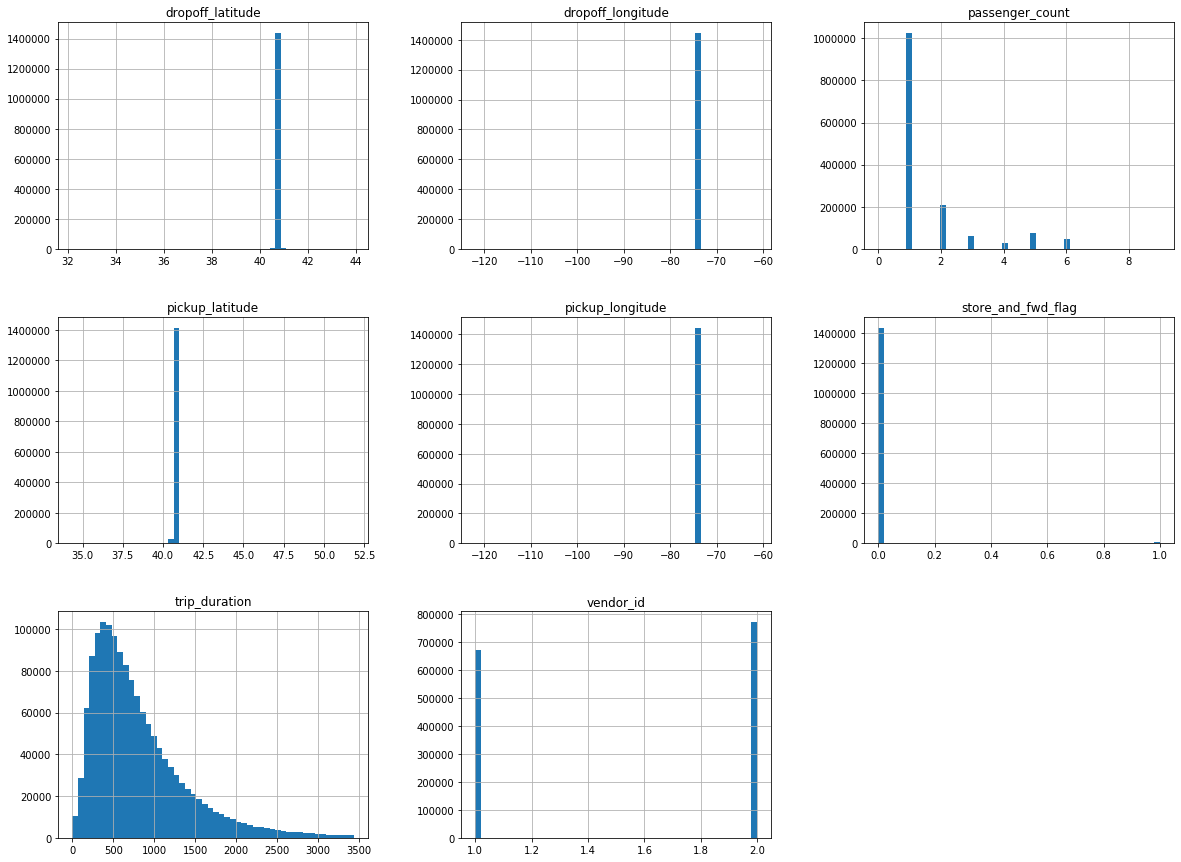

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline
train_taxi.hist(bins=50, figsize=(20,15))
plt.show()


In [13]:
!pip install --upgrade geopandas
!pip install --upgrade pyshp
!pip install --upgrade shapely
!pip install --upgrade descartes

     |████████████████████████████████| 931kB 2.8MB/s 
     |████████████████████████████████| 10.4MB 10.1MB/s 
     |████████████████████████████████| 14.7MB 312kB/s 
     |████████████████████████████████| 225kB 2.8MB/s 
  Created wheel for pyshp: filename=pyshp-2.1.0-cp36-none-any.whl size=32609 sha256=2aea76adfa05b6c2d15ed9da2bdb3a4dc1c2073497e9639613742305bc85e18f
  Stored in directory: /root/.cache/pip/wheels/a6/0c/de/321b5192ad416b328975a2f0385f72c64db4656501eba7cc1a
Successfully built pyshp
Requirement already up-to-date: shapely in /usr/local/lib/python3.6/dist-packages (1.7.0)
Requirement already up-to-date: descartes in /usr/local/lib/python3.6/dist-packages (1.1.0)


###### Visualizing Geographical Data (pickup locations)

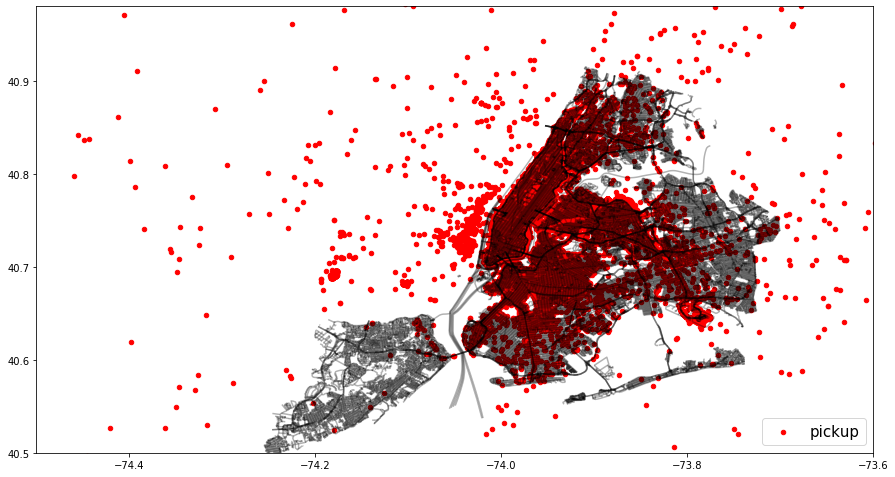

In [14]:
# Plotting Geographical data of pickup locations in New York City

import matplotlib.pyplot as plt
import descartes
import geopandas as gpd
from shapely.geometry import Point, Polygon
%matplotlib inline

nyc_map = gpd.read_file("/content/drive/My Drive/Data/nyc_roads.shp")

geometry = [Point(xy) for xy in zip(train_taxi["pickup_longitude"],train_taxi["pickup_latitude"])]
geo_train_data = gpd.GeoDataFrame(train_taxi,
                                  crs='EPSG:4326',
                                  geometry=geometry)

figure,ax = plt.subplots(figsize=(15,15))
nyc_map.plot(ax=ax, alpha=0.3, color="black")
geo_train_data.plot(ax=ax, markersize=20, color ="red",
                    marker = "o",
                    label = "pickup")
plt.xlim(-74.50,-73.60)
plt.ylim( 40.50,40.98)
plt.legend(prop={'size': 15})
plt.show()

# train_taxi.plot(kind="scatter", x="pickup_longitude", y="pickup_latitude", alpha=0.1)

###### Visualizing Geographical Data (dropoff locations)

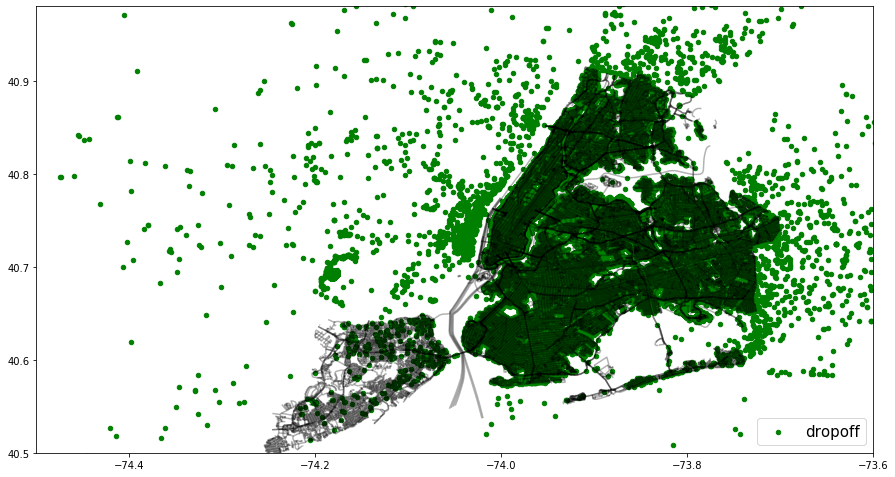

In [15]:
# Plotting Geographical data of pickup locations in New York City

import matplotlib.pyplot as plt
import descartes
import geopandas as gpd
from shapely.geometry import Point, Polygon
%matplotlib inline

nyc_map = gpd.read_file("/content/drive/My Drive/Data/nyc_roads.shp")

geometry = [Point(xy) for xy in zip(train_taxi["dropoff_longitude"],train_taxi["dropoff_latitude"])]
geo_train_data = gpd.GeoDataFrame(train_taxi,
                                  crs='EPSG:4326',
                                  geometry=geometry)

figure,ax = plt.subplots(figsize=(15,15))
nyc_map.plot(ax=ax, alpha=0.3, color="black")
geo_train_data.plot(ax=ax, markersize=20, color ="green",
                    marker = "o",
                    label = "dropoff")
plt.xlim(-74.50,-73.60)
plt.ylim( 40.50,40.98)
plt.legend(prop={'size': 15})
plt.show()


###### Looking for Correlation between data
###### standard correlation coefficient (also called Pearson’s r) between every pair of attributes using the corr() method

In [0]:
matrix_correlation = train_taxi.corr()

###### Now let’s look at how much each attribute correlates with the trip duration value:

In [17]:
matrix_correlation["trip_duration"].sort_values(ascending=False)

trip_duration         1.000000
pickup_longitude      0.157381
dropoff_longitude     0.100835
store_and_fwd_flag    0.021773
passenger_count       0.014590
vendor_id             0.007437
dropoff_latitude     -0.146015
pickup_latitude      -0.161655
Name: trip_duration, dtype: float64

Another way to check for correlation between attributes is to use Pandas’
scatter_matrix function, which plots every numerical attribute against every other
numerical attribute. Since there are now 10 numerical attributes, we would get 10² =100 plots, which would not fit on a page, so let’s just focus on a few promising
attributes that seem most correlated with the trip duration

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f3835f1b2e8>,
      dtype=object)

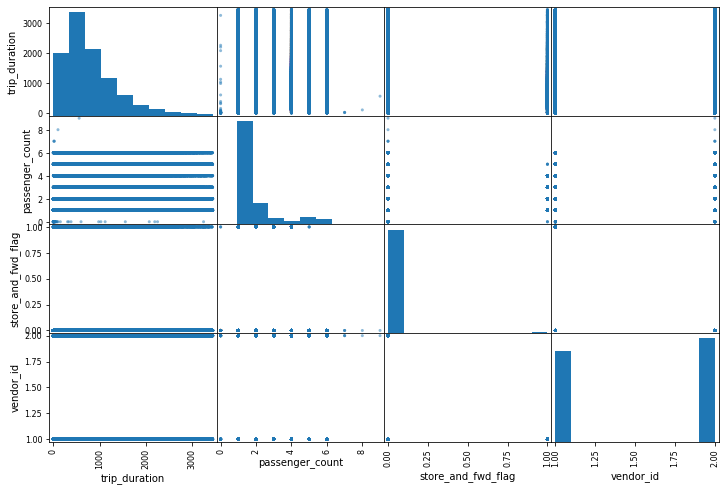

In [18]:
%matplotlib inline
from pandas.plotting import scatter_matrix
attributes = ["trip_duration",
              "passenger_count", 
              "store_and_fwd_flag",
              "vendor_id",
              "pickup_datetime"]
scatter_matrix(train_taxi[attributes], figsize=(12, 8))

In [0]:
del train_taxi['geometry']

In [0]:
#     excluding all pickup and dropoff locations that are outside of new York City
xlim = [-74.03, -73.77]
ylim = [40.63, 40.85]
train_taxi = train_taxi[(train_taxi.pickup_longitude> xlim[0]) & (train_taxi.pickup_longitude < xlim[1])]
train_taxi = train_taxi[(train_taxi.dropoff_longitude> xlim[0]) & (train_taxi.dropoff_longitude < xlim[1])]
train_taxi = train_taxi[(train_taxi.pickup_latitude> ylim[0]) & (train_taxi.pickup_latitude < ylim[1])]
train_taxi = train_taxi[(train_taxi.dropoff_latitude> ylim[0]) & (train_taxi.dropoff_latitude < ylim[1])]

### After removing all coordinates that are approximatively not included inside new york city  we will get 1,425,132 trips instead of 1,444,051 ( we got rid of 18,919 rows which is 1.31 % of the original data )

In [21]:
train_taxi.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1425132 entries, id2875421 to id1209952
Data columns (total 10 columns):
vendor_id             1425132 non-null int64
pickup_datetime       1425132 non-null datetime64[ns]
dropoff_datetime      1425132 non-null datetime64[ns]
passenger_count       1425132 non-null int64
pickup_longitude      1425132 non-null float64
pickup_latitude       1425132 non-null float64
dropoff_longitude     1425132 non-null float64
dropoff_latitude      1425132 non-null float64
trip_duration         1425132 non-null int64
store_and_fwd_flag    1425132 non-null uint8
dtypes: datetime64[ns](2), float64(4), int64(3), uint8(1)
memory usage: 110.1+ MB


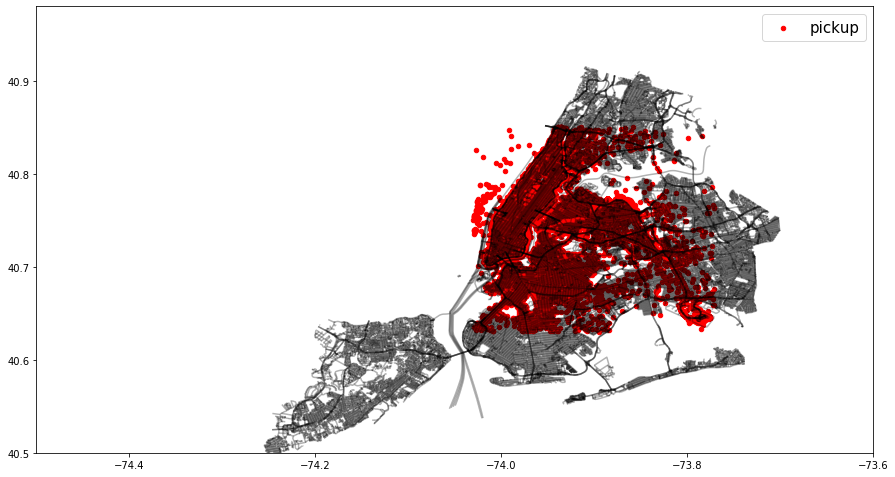

In [22]:
# Plotting Geographical data of pickup locations in New York City

import matplotlib.pyplot as plt
import descartes
import geopandas as gpd
from shapely.geometry import Point, Polygon
%matplotlib inline

nyc_map = gpd.read_file("/content/drive/My Drive/Data/nyc_roads.shp")

geometry = [Point(xy) for xy in zip(train_taxi["pickup_longitude"],train_taxi["pickup_latitude"])]
geo_train_data = gpd.GeoDataFrame(train_taxi,
                                  crs='EPSG:4326',
                                  geometry=geometry)

figure,ax = plt.subplots(figsize=(15,15))
nyc_map.plot(ax=ax, alpha=0.3, color="black")
geo_train_data.plot(ax=ax, markersize=20, color ="red",
                    marker = "o",
                    label = "pickup")
plt.xlim(-74.50,-73.60)
plt.ylim( 40.50,40.98)
plt.legend(prop={'size': 15})
plt.show()

# train_taxi.plot(kind="scatter", x="pickup_longitude", y="pickup_latitude", alpha=0.1)

In [0]:
# no need to have geometery attribute
del train_taxi['geometry']

In [0]:
train_taxi['pickup_date_str'] = train_taxi['pickup_datetime'].map(lambda x:str(x).replace("-","").replace(":","").replace(" ",""))


## Creating new attributes to dive deep into date's pickup

In [0]:
train_taxi['month'] = train_taxi['pickup_datetime'].map(lambda x: int(x.month))
train_taxi['day'] = train_taxi['pickup_datetime'].map(lambda x: int(x.day))
train_taxi['hours'] = train_taxi['pickup_datetime'].map(lambda x: int(x.hour))
test_taxi['hours'] = test_taxi['pickup_datetime'].map(lambda x: int(x.hour))
train_taxi['minutes'] = train_taxi['pickup_datetime'].map(lambda x: int(x.minute))
train_taxi['seconds'] = train_taxi['pickup_datetime'].map(lambda x: int(x.second))
train_taxi['month_day'] = train_taxi['pickup_datetime'].map(lambda x: str(x.month) +str("_")+ str(x.day))

In [26]:
train_taxi.head(5)

,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration,store_and_fwd_flag,pickup_date_str,month,day,hours,minutes,seconds,month_day
id,,,,,,,,,,,,,,,,,
id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,455,0,20160314172455,3,14,17,24,55,3_14
id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,663,0,20160612004335,6,12,0,43,35,6_12
id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,2124,0,20160119113524,1,19,11,35,24,1_19
id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,429,0,20160406193231,4,6,19,32,31,4_6
id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,435,0,20160326133055,3,26,13,30,55,3_26


Show distribution of pickup months over all trips in a histogram

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f3817508048>]],
      dtype=object)

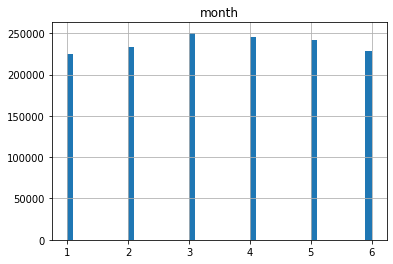

In [27]:
train_taxi.hist(column='month', bins=50)

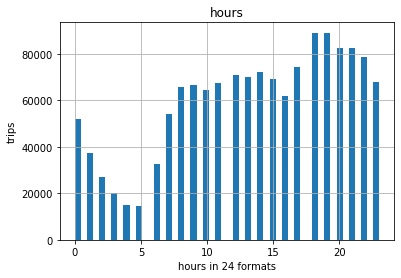

In [28]:
axarr = train_taxi.hist(column='hours', bins=50)
for ax in axarr.flatten():
    ax.set_xlabel("hours in 24 formats")
    ax.set_ylabel("trips")

Add attributes that convert the number of the day to weekday name

In [0]:
train_taxi['day_of_week'] = train_taxi['pickup_datetime'].dt.day_name()
test_taxi['day_of_week'] = test_taxi['pickup_datetime'].dt.day_name()

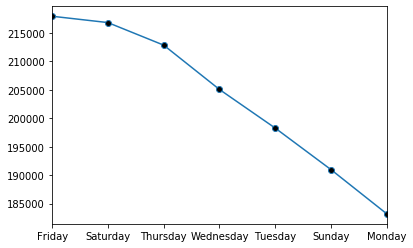

In [30]:
train_taxi.day_of_week.value_counts().plot(marker='o', markerfacecolor='black')

## Add a boolean attribute that represents United States Federal holidays, the aim of this new attribute is to see wether holidays can affects the number of trips


In [0]:
import pandas as pd
from pandas.tseries.holiday import USFederalHolidayCalendar as calendar

date_range = pd.date_range(start=train_taxi.pickup_datetime.min(), end=train_taxi.pickup_datetime.max())
cal = calendar()
holidays = cal.holidays(start=date_range.min(), end=date_range.max())
train_taxi['Holiday'] = train_taxi['pickup_datetime'].isin(holidays)

In [32]:
train_taxi.Holiday.value_counts()
# None of the days was a holiday so we can delete this column

False    1425132
Name: Holiday, dtype: int64

In [0]:
del train_taxi['Holiday']

## add attribute distance between pickup and dropoff coordinates

In [0]:
import pandas as pd
import numpy as np
from pyproj import Geod

wgs84_geod = Geod(ellps='WGS84') #Distance will be measured on this ellipsoid - more accurate than a spherical method

#Get distance between pairs of lat-lon points
def Distance(lat1,lon1,lat2,lon2):
    az12,az21,dist = wgs84_geod.inv(lon1,lat1,lon2,lat2) #Yes, this order is correct
    return dist
#Add/update a column to the data frame with the distances (in metres)
train_taxi['approx_distance'] = Distance(train_taxi['pickup_latitude'].tolist(),train_taxi['pickup_longitude'].tolist(),train_taxi['dropoff_latitude'].tolist(),train_taxi['dropoff_longitude'].tolist())
test_taxi['approx_distance'] = Distance(test_taxi['pickup_latitude'].tolist(),test_taxi['pickup_longitude'].tolist(),test_taxi['dropoff_latitude'].tolist(),test_taxi['dropoff_longitude'].tolist())


In [0]:
train_taxi['approx_distance'] = train_taxi['approx_distance'].apply(lambda x: round(x,3))

## Convert categorigal week day to number 

In [0]:
train_taxi['weekday_cat'] = train_taxi['day_of_week'].map({
    'Monday':1,
    'Tuesday':2,
    'Wednesday':3,
    'Thursday':4,
    'Friday':5,
    'Saturday':6,
    'Sunday':7
})

test_taxi['weekday_cat'] = test_taxi['day_of_week'].map({
    'Monday':1,
    'Tuesday':2,
    'Wednesday':3,
    'Thursday':4,
    'Friday':5,
    'Saturday':6,
    'Sunday':7
})

In [37]:
train_taxi.head(5)

,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration,store_and_fwd_flag,pickup_date_str,month,day,hours,minutes,seconds,month_day,day_of_week,approx_distance,weekday_cat
id,,,,,,,,,,,,,,,,,,,,
id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,455,0,20160314172455,3,14,17,24,55,3_14,Monday,1502.172,1
id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,663,0,20160612004335,6,12,0,43,35,6_12,Sunday,1808.660,7
id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,2124,0,20160119113524,1,19,11,35,24,1_19,Tuesday,6379.687,2
id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,429,0,20160406193231,4,6,19,32,31,4_6,Wednesday,1483.632,3
id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,435,0,20160326133055,3,26,13,30,55,3_26,Saturday,1187.038,6


## Exploring Correlation between distance and trip duration

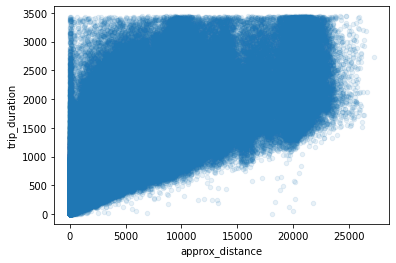

In [38]:
train_taxi.plot(kind="scatter", x="approx_distance", y="trip_duration",
alpha=0.1)


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f383183a208>,
      dtype=object)

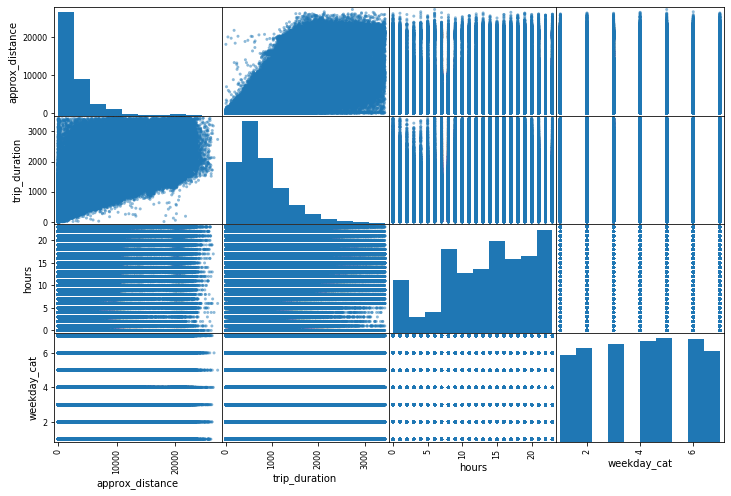

In [39]:
from pandas.plotting import scatter_matrix

attributes = ["approx_distance", "trip_duration", "hours", "weekday_cat"]
scatter_matrix(train_taxi[attributes], figsize=(12, 8))

## Trying to add an attribute that is combination of approximative distance and trip duration ( we will call it speed )

In [0]:
train_taxi['speed'] = train_taxi['approx_distance']/train_taxi['trip_duration']
train_taxi['speed'] = train_taxi['speed']

# train_taxi['approx_trip_duration'] = train_taxi['approx_distance']/train_taxi['speed'].mean() 
train_taxi['mean_trip_duration'] = train_taxi['trip_duration'].mean() 


test_taxi['speed']=train_taxi['speed'].mean() 
test_taxi['mean_trip_duration']=train_taxi['trip_duration'].mean() 

In [0]:
test_taxi.head(5)

,id,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,hours,day_of_week,approx_distance,weekday_cat,speed,approx_trip_duration
0,id3004672,1,2016-06-30 23:59:58,1,-73.988129,40.732029,-73.990173,40.756680,0,23,Thursday,2742.862621,4,3.94853,796.837574
1,id3505355,1,2016-06-30 23:59:53,1,-73.964203,40.679993,-73.959808,40.655403,0,23,Thursday,2755.773542,4,3.94853,796.837574
2,id1217141,1,2016-06-30 23:59:47,1,-73.997437,40.737583,-73.986160,40.729523,0,23,Thursday,1307.111854,4,3.94853,796.837574
3,id2150126,2,2016-06-30 23:59:41,1,-73.956070,40.771900,-73.986427,40.730469,0,23,Thursday,5266.978424,4,3.94853,796.837574
4,id1598245,1,2016-06-30 23:59:33,1,-73.970215,40.761475,-73.961510,40.755890,0,23,Thursday,961.745365,4,3.94853,796.837574


## Taking look at correlation matrix with new attributes (correlation with target value, which is trip duration)

###### Positive Correlation: both variables change in the same direction.
###### Neutral Correlation: No relationship in the change of the variables.
###### Negative Correlation: variables change in opposite directions.

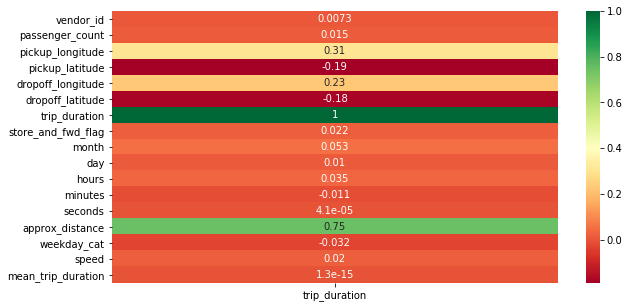

In [19]:
import seaborn as sns

corr_matrix = train_taxi.corr()
top_corr_features = corr_matrix.index
plt.figure(figsize=(10,5))
#plot heat map
g = sns.heatmap(corr_matrix[['trip_duration']],annot=True,cmap="RdYlGn")

###### approximative distance (positively) , pickup and dropoff locations (negatively) are the most correlated attributes with trip duration

In [43]:
train_taxi.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1425132 entries, id2875421 to id1209952
Data columns (total 22 columns):
vendor_id             1425132 non-null int64
pickup_datetime       1425132 non-null datetime64[ns]
dropoff_datetime      1425132 non-null datetime64[ns]
passenger_count       1425132 non-null int64
pickup_longitude      1425132 non-null float64
pickup_latitude       1425132 non-null float64
dropoff_longitude     1425132 non-null float64
dropoff_latitude      1425132 non-null float64
trip_duration         1425132 non-null int64
store_and_fwd_flag    1425132 non-null uint8
pickup_date_str       1425132 non-null object
month                 1425132 non-null int64
day                   1425132 non-null int64
hours                 1425132 non-null int64
minutes               1425132 non-null int64
seconds               1425132 non-null int64
month_day             1425132 non-null object
day_of_week           1425132 non-null object
approx_distance       1425132 non-null floa

In [44]:
print(train_taxi.passenger_count.value_counts())

1    1010854
2     204628
5      76276
3      58448
6      47233
4      27641
0         52
Name: passenger_count, dtype: int64


###### Remove rows that have 0 passenger in the trip, so we won't have noisy dataset

In [0]:
train_taxi = train_taxi[(train_taxi['passenger_count'] > 0)]

###### 1 maps to night, 2 maps to evening, 3 maps to afternoon, 4 maps to morning

In [29]:

# # taxi = train_taxi
def f(x):
    if (x > 4) and (x <= 8):
        #'Early Morning'
        return 1          
    elif (x > 8) and (x <= 12 ):
        #'Morning'
        return 2 
    elif (x > 12) and (x <= 16):
        #'Noon'
        return 3
    elif (x > 16) and (x <= 20) :
        #'Eve'
        return 4
    elif (x > 20) and (x <= 24):
        # 'Night'
        return 5
    elif (x <= 4):
        #'Late Night'
        return 6   
train_taxi.loc[:,'day_part'] = train_taxi['hours'].apply(f)
test_taxi.loc[:,'day_part'] = test_taxi['hours'].apply(f)

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:376: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [0]:
# from sklearn.ensemble import RandomForestRegressor

# prepared_2 = train_taxi[['approx_distance','pickup_hours']]
# labels_2 = train_taxi['trip_duration']

# random_reg = RandomForestRegressor(n_estimators = 100)  
# random_reg.fit(prepared_2, labels_2)

In [0]:
import pandas as pd

parse_date_att = ["date"]
weather = pd.read_csv("/content/drive/My Drive/Data/weather.csv", parse_dates=parse_date_att)

In [0]:
weather['month'] = weather['date'].map(lambda x: int(x.month))
weather['day'] = weather['date'].map(lambda x: int(x.day))

In [0]:
import numpy as np

test_taxi['month'] = test_taxi['pickup_datetime'].map(lambda x: int(x.month))
test_taxi['day'] = test_taxi['pickup_datetime'].map(lambda x: int(x.day))

test_taxi = pd.merge(test_taxi, weather,on=['month','day'])
train_taxi = pd.merge(train_taxi, weather, on=['month','day'])

In [0]:
test_taxi.loc[test_taxi['precipitation'] == 'T', 'precipitation'] = 0
test_taxi.loc[test_taxi['snow fall'] == 'T', 'snow fall'] = 0
test_taxi.loc[test_taxi['snow depth'] == 'T', 'snow depth'] = 0

test_taxi['precipitation'] = test_taxi['precipitation'].astype(float)
test_taxi['snow fall'] = test_taxi['snow fall'].astype(float)
test_taxi['snow depth'] = test_taxi['snow depth'].astype(float)

train_taxi.loc[train_taxi['precipitation'] == 'T', 'precipitation'] = 0
train_taxi.loc[train_taxi['snow fall'] == 'T', 'snow fall'] = 0
train_taxi.loc[train_taxi['snow depth'] == 'T', 'snow depth'] = 0

train_taxi['precipitation'] = train_taxi['precipitation'].astype(float)
train_taxi['snow fall'] = train_taxi['snow fall'].astype(float)
train_taxi['snow depth'] = train_taxi['snow depth'].astype(float)

In [30]:
# del train_taxi['month_day']
# del train_taxi['day_of_week']
# del train_taxi['day']
# del train_taxi['month']
# del train_taxi['date']
# del train_taxi['pickup_datetime']
# del train_taxi['day']
# del train_taxi['minutes']
# del train_taxi['seconds']
# del train_taxi['pickup_date_str']
train_taxi.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 425419 entries, 0 to 1421752
Data columns (total 24 columns):
vendor_id              425419 non-null int64
dropoff_datetime       425419 non-null datetime64[ns]
passenger_count        425419 non-null int64
pickup_longitude       425419 non-null float64
pickup_latitude        425419 non-null float64
dropoff_longitude      425419 non-null float64
dropoff_latitude       425419 non-null float64
trip_duration          425419 non-null int64
store_and_fwd_flag     425419 non-null uint8
pickup_date_str        425419 non-null object
hours                  425419 non-null int64
minutes                425419 non-null int64
seconds                425419 non-null int64
approx_distance        425419 non-null float64
weekday_cat            425419 non-null int64
speed                  425419 non-null float64
mean_trip_duration     425419 non-null float64
maximum temperature    425419 non-null int64
minimum temperature    425419 non-null int64
average t

In [0]:
train_taxi = train_taxi[train_taxi['precipitation']>0]

### SGDRegressor

In [54]:
from sklearn import linear_model


clf = linear_model.SGDRegressor()
prepared = train_taxi[['approx_distance']]
labels = train_taxi['trip_duration']
clf.fit(prepared, labels)



SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
             eta0=0.01, fit_intercept=True, l1_ratio=0.15,
             learning_rate='invscaling', loss='squared_loss', max_iter=1000,
             n_iter_no_change=5, penalty='l2', power_t=0.25, random_state=None,
             shuffle=True, tol=0.001, validation_fraction=0.1, verbose=0,
             warm_start=False)

In [0]:
# clf is a trained model
X = test_taxi[['approx_distance']]
y_predicted = clf.predict(X)

In [0]:
Z = pd.DataFrame()
Z["id"]= test_taxi["id"]
Z["trip_duration"] = y_predicted

In [0]:
Z.to_csv("/content/drive/My Drive/Data/sample_submission_17.csv",index=False)

### Linear Regression

In [52]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics


prepared = train_taxi[['approx_distance','precipitation','mean_trip_duration','weekday_cat','hours','passenger_count','speed', 'day_part']]
labels = train_taxi['trip_duration'].values.reshape(-1,1)

regressor = LinearRegression()  
regressor.fit(prepared, labels)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [53]:
regressor.coef_

array([[ 1.64473874e-01, -4.81290158e+00,  1.06581410e-14,
        -6.05471122e-01,  5.54343275e-01,  1.44937064e+00,
        -1.22888677e+02, -8.24639243e+00]])

In [0]:
X = test_taxi[['approx_distance','precipitation','mean_trip_duration','weekday_cat','hours','passenger_count', 'speed','day_part']]
my_prediction = regressor.predict(X)

# Mean Squared Error

In [60]:
from sklearn.metrics import mean_squared_error
my_predictions = regressor.predict(prepared) # use it to calculate the RMSE
error = mean_squared_error(labels, my_predictions)
error = np.sqrt(error)
print("Mean Squared error : " + str(error))
print("minimum trip duration : " + str(train_taxi['trip_duration'].min()))
print("max trip duration : " + str(train_taxi['trip_duration'].max()))
print(len(train_taxi[train_taxi['trip_duration'] == 1]))

Mean Squared error : 280.5737275956289
minimum trip duration : 1
max trip duration : 3439
7


## R2 Score

### if R2 is closer to 0, then our model is Bad, if it's closer to 1, then our model is Good.

In [66]:
from sklearn.metrics import r2_score
my_predictions = regressor.predict(prepared) # use it to calculate the RMSE
print("R2 Score is :" +str(r2_score(labels,my_predictions)))
if(abs(r2_score(labels,my_predictions) - 1 <= 1)):
  print("Our Model is Good")
elif(abs(r2_score(labels,my_predictions) - 0 <= 0)):
  print("Our Model is Bad")

R2 Score is :0.7465549228429009
Our Model is Good


In [0]:
Submission_lin_reg = pd.DataFrame()
Submission_lin_reg["id"]= test_taxi["id"]
Submission_lin_reg["trip_duration"] = my_prediction

In [0]:
S.to_csv("Data/sample_submission_17.csv",index=False)

In [0]:
# train_taxi.to_csv("Data/train.csv", index = False)

# XG Boost

In [65]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error
import pandas as pd
import numpy as np

prepared = train_taxi[['approx_distance','weekday_cat','hours','passenger_count','speed']]
labels = train_taxi['trip_duration'].values.reshape(-1,1)
# data_dmatrix = xgb.DMatrix(data=prepared,label=labels)

xg_reg = xgb.XGBRegressor(objective ='reg:linear', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 10)

xg_reg.fit(prepared,labels)

X = test_taxi[['approx_distance','weekday_cat','hours','passenger_count', 'speed']]

preds = xg_reg.predict(X)

[15:09:12] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [0]:
X = pd.DataFrame()
X["id"]= test_taxi["id"]
X["trip_duration"] = preds

In [0]:
X.to_csv("/content/drive/My Drive/Data/sample_submission_19.csv",index=False)


# Random Forest
